In [1]:
import numpy as np
import matplotlib.pyplot as plt

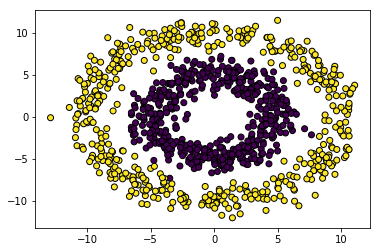

3162.8515866226753
524.5035810268856
401.42434793730115
324.0282642746548
272.2059874435619
235.4903851828995
208.24872345670641
187.27512360526993
170.64015075925437
157.12343604264112
145.91938112009774
136.4764193984782
128.40493503226796
121.4222199471924
115.31831195123786
109.93407968410362
105.14674774226472
100.86008571549517
96.99760368142776
93.49773481464423
90.31036122645786
87.39426638487976
84.71523854875474
82.24463930543745
79.9583094948744
77.83572331425069
75.85932734056274
74.01401897346494
72.28673115064967
70.66609889429289
69.142189464822
67.70628239262622
66.35068894372971
65.06860300245565
63.85397716472479
62.701419198920185
61.60610506668197
60.56370548885419
59.57032365362015
58.62244213942472
57.71687749748649
56.85074123191352
56.021406147870245
55.22647722356286
54.463766310411096
53.73127008556531
53.027150777974505
52.3497192682319
51.69742022705139
51.06881901032735
Final weight: [-1.18337315e+01  1.59804243e+00 -1.71053964e-02 -3.73782918e-03]
Final cl

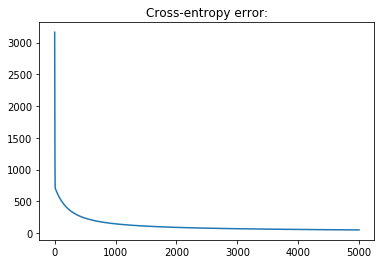

In [2]:
N = 1000
D = 2

R_inner = 5
R_outer = 10

R1 = np.random.randn(int(N/2)) + R_inner
theta = 2*np.pi*np.random.random(int(N/2))
X_inner = np.concatenate([[R1*np.cos(theta)], [R1*np.sin(theta)]]).T

R2 = np.random.randn(int(N/2)) + R_outer
theta = 2*np.pi*np.random.random(int(N/2))
X_outer = np.concatenate([[R2*np.cos(theta)], [R2*np.sin(theta)]]).T

X = np.concatenate([X_inner, X_outer])
T = np.array([0]*int(N/2) + [1]*int(N/2))

plt.scatter(X[:,0], X[:,1], c=T, edgecolor='black')
plt.show()

ones = np.array([[1]*N]).T
r = np.zeros((N, 1))
for i in range(N):
    r[i] = np.sqrt(X[i,:].dot(X[i,:]))
    
Xb = np.concatenate((ones, r, X), axis=1)

w = np.random.rand(D + 2)
z = Xb.dot(w)

def sigmoid(z):
    return 1/(1 + np.exp(-z))

Y = sigmoid(z)

def cross_entropy(T, Y):
    E = 0
    for i in range(N):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1 - Y[i])
    return E

learning_rate = 0.0001
error = []
for i in range(5000):
    e = cross_entropy(T, Y)
    error.append(e)
    if i%100 == 0:
        print(e)
        
    w += learning_rate*((T - Y).T.dot(Xb) - 0.01*w)
    Y = sigmoid(Xb.dot(w))
    
plt.plot(error)
plt.title('Cross-entropy error:')
print('Final weight:', w)
print('Final classification rate:', 1 - np.abs(T - np.round(Y)).sum() / N)